In [ ]:
import csv
import numpy as np
from math import sqrt, pi, sin, cos
import matplotlib.pyplot as plt

#makes plots bigger and use Latex fonts
from matplotlib import rcParams
rcParams["figure.dpi"]=600
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 2.5
rcParams['legend.framealpha'] = 1
rcParams['legend.edgecolor'] = 'k'sharey = True

In [41]:
HBARC = 197.3269718
NEUTRON_MASS = 939.5653 / HBARC
PROTON_MASS = 938.272 / HBARC
NUCLEON_MASS = 2 * NEUTRON_MASS * PROTON_MASS / (NEUTRON_MASS + PROTON_MASS)
MUON_MASS = 105.7 / HBARC
ELECTRON_MASS = 0.511 / HBARC
GA = 1.267
MEVFM3_TO_GCM3 = 1.78e12
FM4_TO_DYNECM2 = 3.16e35
G_TO_FM = 7.69**2 / 10**16 / HBARC**2

In [96]:
#results csvs have cc of the form
#mean of n, stddev of n, mean of p, stddev of p, n, ndegen, p, pdegen, eB, T, mun, n, yp, knu, cost, ui

cc_filenames = ['./opacity csvs/cc' + elt + '.csv' for elt in ['2', '3', '4', '5', '6']]

data_arr = np.empty((45, 16))
counter = 0
for filename in cc_filenames:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            for ix, elt in enumerate(row):
                if elt == '-Times-': 
                    row[ix] = 0
            data_arr[counter, :] = np.array([float(elt) for elt in row])
            counter += 1

<>:10: SyntaxWarning: invalid escape sequence '\k'
<>:17: SyntaxWarning: invalid escape sequence '\k'
<>:10: SyntaxWarning: invalid escape sequence '\k'
<>:17: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_378/2672783266.py:10: SyntaxWarning: invalid escape sequence '\k'
  ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')
/tmp/ipykernel_378/2672783266.py:17: SyntaxWarning: invalid escape sequence '\k'
  ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')
/tmp/ipykernel_378/2672783266.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([''])
/tmp/ipykernel_378/2672783266.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([''])


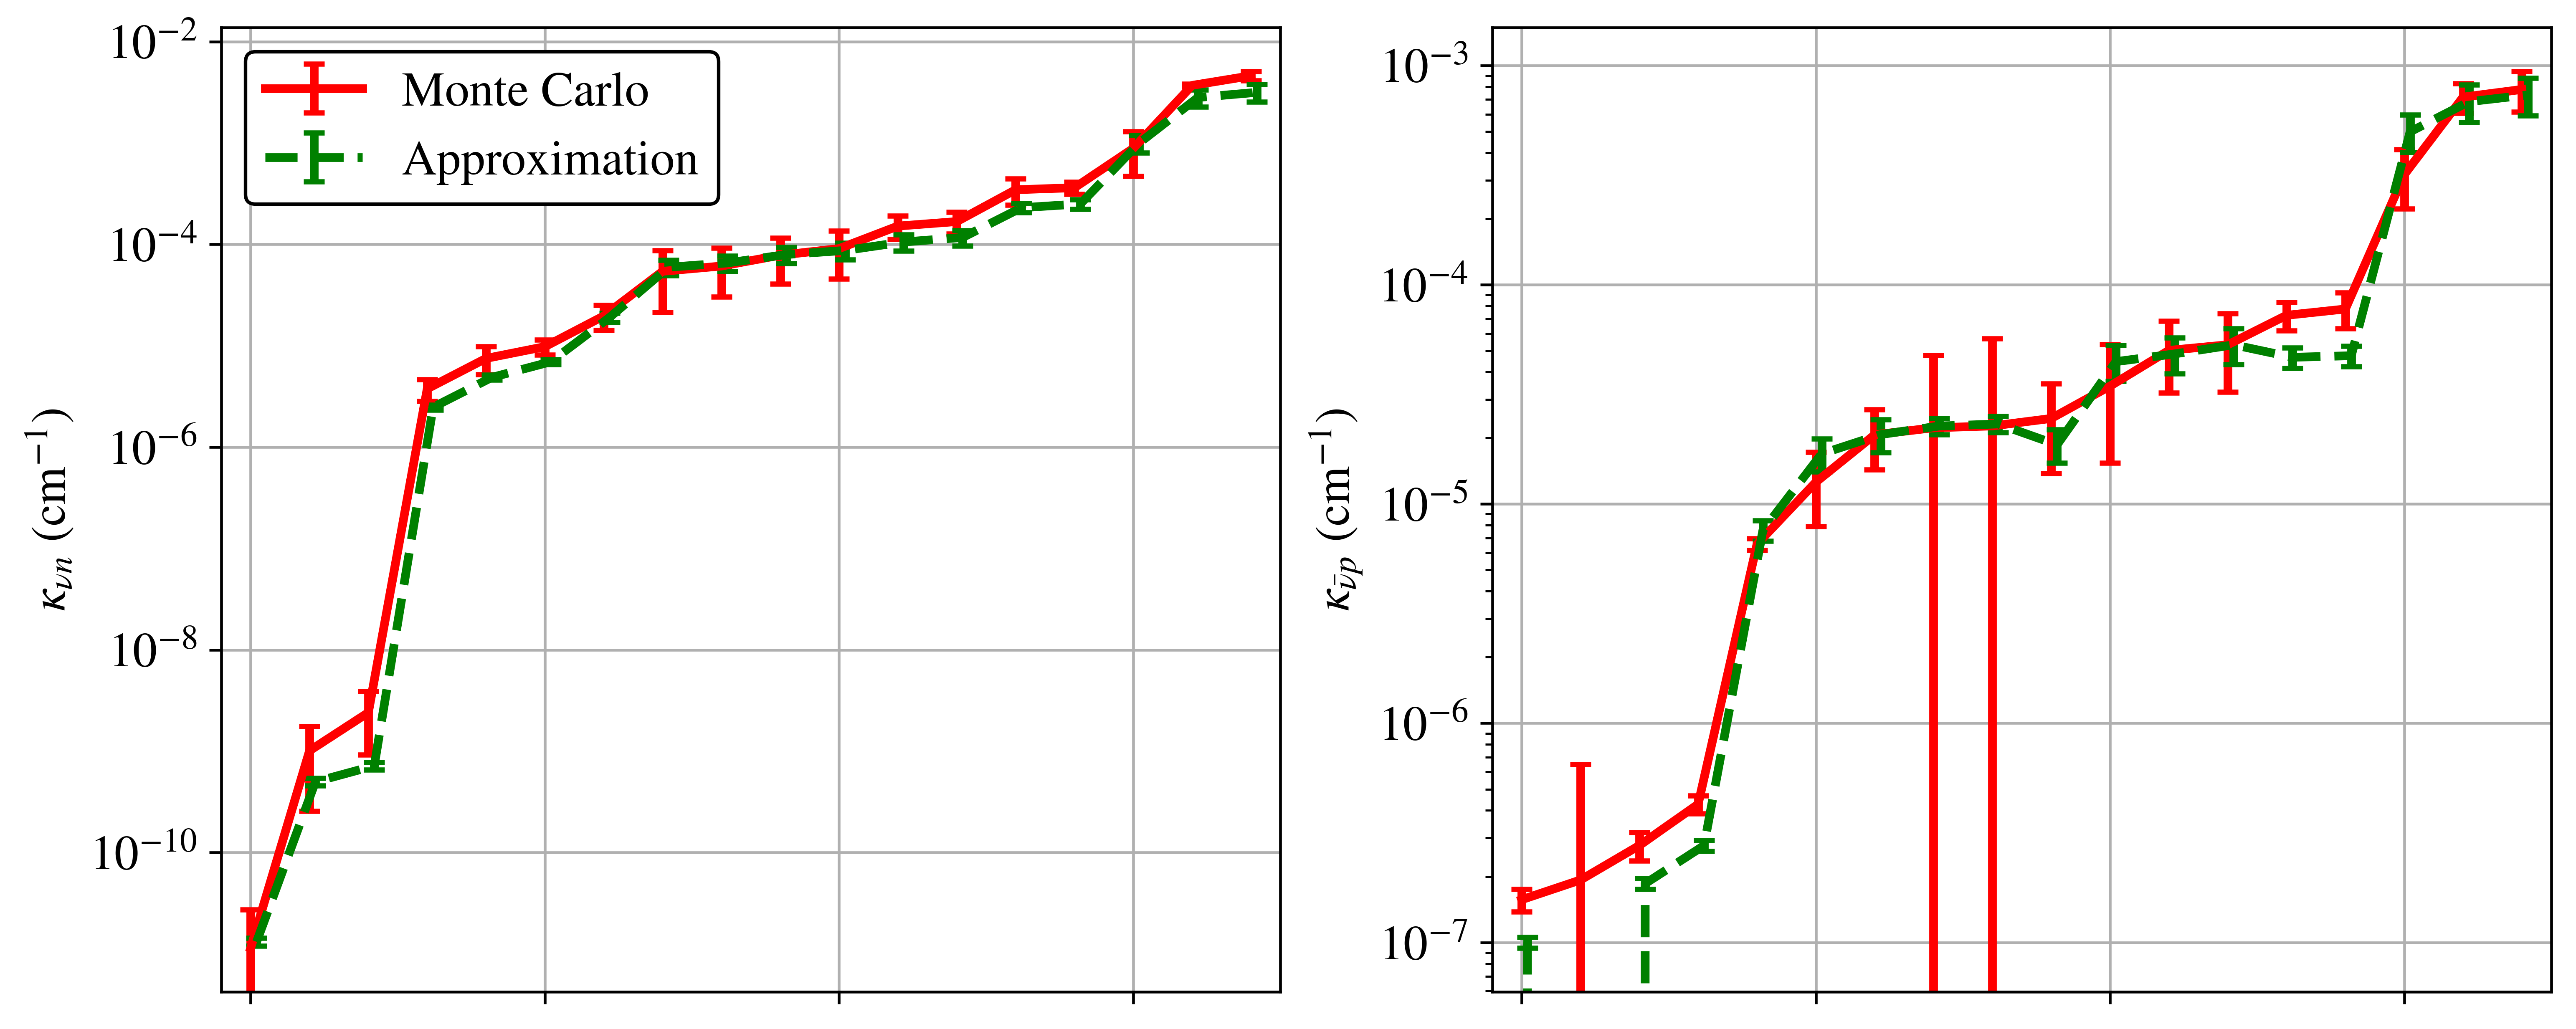

In [94]:
sorted_both = data_arr[np.argsort(data_arr[:, 0])]
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1
sorted = sorted_both[isdegen]

fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.2)
ax1, ax2 = ax
ax1.errorbar(range(isdegen.sum()), sorted[:, 0], sorted[:, 1], fmt = 'r-', capsize = 3, capthick = 1.5)
ax1.errorbar([elt + 0.1 for elt in range(isdegen.sum())], sorted[:, 4], np.sqrt(sorted[:, 9] / NUCLEON_MASS) * sorted[:, 4], fmt = 'g--', capsize = 3, capthick = 1.5)
ax1.set_ylabel('$\kappa_{\\nu n}$ (cm$^{-1}$)')

sorted_both = data_arr[np.argsort(data_arr[:, 2])]
isdegen = sorted_both[:, 10] / sorted_both[:, 9] > -1
sorted = sorted_both[isdegen]
ax2.errorbar(range(isdegen.sum()), sorted[:, 2], sorted[:, 3], fmt = 'r-', capsize = 3, capthick = 1.5)
ax2.errorbar([elt + 0.1 for elt in range(isdegen.sum())], sorted[:, 6], np.sqrt(sorted[:, 9] / NUCLEON_MASS) * sorted[:, 6], fmt = 'g--', capsize = 3, capthick = 1.5)
ax2.set_ylabel('$\kappa_{\\bar{\\nu} p}$ (cm$^{-1}$)')

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([-0.5, 17.5])
ax2.set_xlim([-0.5, 17.5])
ax1.set_xticklabels([''])
ax2.set_xticklabels([''])
ax1.legend(['Monte Carlo', 'Approximation'])
ax1.grid(alpha = 1)
ax2.grid(alpha = 1)
#plt.ylim([1e-6, 1e-3])

In [30]:
test[np.argsort(test[:, 0])]

array([[-1,  5,  3],
       [ 1,  2,  3]])